# Emotions Logistical Regression

### Imports


In [2]:
import pandas as pd
import string
import re

#spacy 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Graphs
from sklearn import metrics
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

### Dataset 

In [4]:
# read dataset 
df = pd.read_excel('Diabetes-classification.xlsx', sheet_name ='Emotions')

# the features we want to analyze
X = df.loc[:,'discussion_text']

# the labels, or answers, we want to test against
ylabels = df.loc[:,'Label']

# removes all duplicates from list 
Labels = list(dict.fromkeys(ylabels)) 
print(Labels)

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

X_train_test, y_train_test = train_test_split((X, ylabels), test_size=0.3, random_state=42)

['Trust', 'Disgust', 'Anticipation', 'Sadness', 'Anger', 'Fear', 'Joy', 'Surprise']


### Preprocessing


In [5]:
# Create our list of punctuation marks
punctuations = string.punctuation
punctuations += "...."

# Create our list of stopwords
stop_words = STOP_WORDS 

# Load English tokenizer, tagger, parser, NER and word vectors
parser = spacy.load('en_core_web_sm')

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [6]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
 
    # remove numbers 
    text = re.sub(r'\d+', '', text)

    # remove all links
    text = re.sub(
        r"(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))", 
        'link_to_website', 
        text
    )

    # Removing spaces and converting text into lowercase
    return text.strip().lower()

def preprocess_text(text):

    return text

# Only one of the following vectorizers is used at a time 

bow_vector = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1)) # vocabulary=opinion_dictionary # accuracy: 0.335626783017284779325

bigram_vector = CountVectorizer(tokenizer=spacy_tokenizer, ngram_range=(2, 2))

tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # accuracy: 0.15846456692913385

### Logistic Regression

Logistic Regression Accuracy: 0.3454724409448819


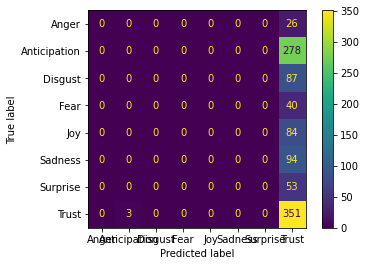

D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Trust,0.0,0.0,0.0,26.0
Disgust,0.0,0.0,0.0,278.0
Anticipation,0.0,0.0,0.0,87.0
Sadness,0.0,0.0,0.0,40.0
Anger,0.0,0.0,0.0,84.0
Fear,0.0,0.0,0.0,94.0
Joy,0.0,0.0,0.0,53.0
Surprise,0.3465,0.9915,0.5135,354.0
accuracy,0.3455,0.3455,0.3455,0.3455
macro avg,0.0433,0.1239,0.0642,1016.0


In [8]:
# Emotion datset 
classifier = LogisticRegression( 
  C=0.0005180859503235987, 
  penalty='l2', 
  solver='lbfgs', 
  dual=False, 
  multi_class='multinomial', 
  tol=1e-3, 
  max_iter=1000
)

# Create pipeline using Bag of Words
pipe = Pipeline([
  ('cleaner', predictors()),
  ('vectorizer', bow_vector), # bow_vector, bigram_vector, tfidf_vector
  ('classifier', classifier)
])

# model generation
pipe.fit(X_train,y_train)

# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
#print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

plot_confusion_matrix(pipe, X_test, y_test)  
plt.show()

measures_info = metrics.classification_report(y_test, predicted, target_names=Labels, output_dict=True) #, labels=np.unique(predictions) 
info = pd.DataFrame(measures_info).transpose()
info = info.round(decimals=4).astype(object)
display(info)

### Optimization

Optimization based on:
- [convergence warning problem info](https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati)
- [scikit documentation hyperparameter optimization](https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html)
- [LogisticRegression optimization tutorial](https://coderzcolumn.com/tutorials/machine-learning/scikit-optimize-guide-to-hyperparameters-optimization#3.-Classification-using-Scikit-Learn-)

In [ ]:
from skopt import gp_minimize
from skopt import space

# function to optimize
def objective(args):
  C=args[0]
  fit_intercept = args[1]

  classifier = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    multi_class='multinomial',
    dual=False,
    tol=1e-3,
    random_state=123,
    C=C,
    fit_intercept=fit_intercept,
    n_jobs=-1,
  )


  # Create pipeline using Bag of Words
  pipe = Pipeline([
    ("cleaner", predictors()),
    ('vectorizer', bow_vector),
    ('classifier', classifier)
  ])

  # model generation
  pipe.fit(X_train,y_train)

  # Predicting with a test dataset
  predicted = pipe.predict(X_test)

  return 1 / metrics.accuracy_score(y_test, predicted)


# Define the parameter space to optimize in
search_space = space.Space([
  space.Real(1e-5, 10000000, prior="log-uniform", transform="identity", name="C"),
  space.Categorical([True, False], name="fit_intercept"),
])

# Run optimization
res_gp = gp_minimize(objective, search_space, n_calls=50, random_state=42)


# Display optimization results 
best_params = dict(list(zip(["C", "fit_intercept"], res_gp.x)))
print("Best Parameters : {}".format(best_params))
print("Best Accuracy : {}".format(1 / res_gp.fun))
"Best score=%.4f" % (1 / res_gp.fun)